Saving Vehicles_Image.png to Vehicles_Image.png

0: 384x640 33 cars, 2 trucks, 485.4ms
Speed: 19.5ms preprocess, 485.4ms inference, 35.1ms postprocess per image at shape (1, 3, 384, 640)


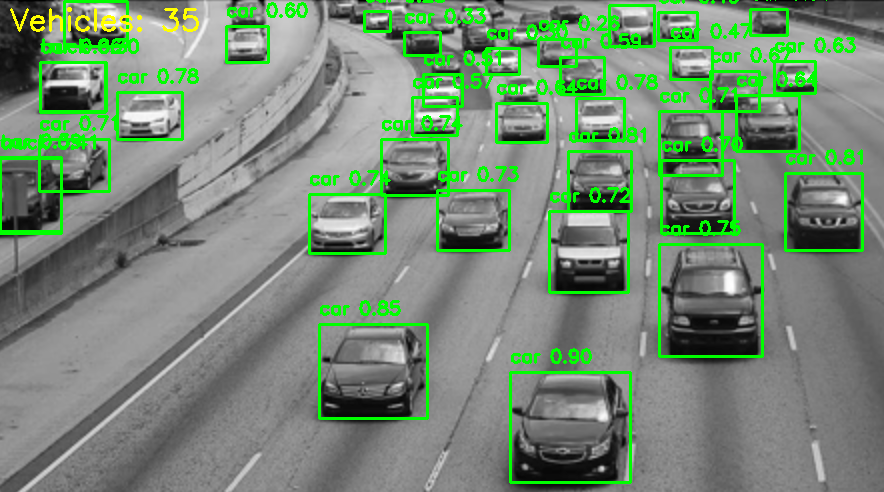

In [2]:
# ✅ 1. Install dependencies
!pip install ultralytics opencv-python

# ✅ 2. Import modules
from ultralytics import YOLO
import cv2
import matplotlib.pyplot as plt
import numpy as np
from google.colab.patches import cv2_imshow
import os

# ✅ 3. Load YOLOv8 model
model = YOLO('yolov8n.pt')  # or 'yolov8s.pt' for better accuracy

# ✅ 4. Upload file (image or video)
from google.colab import files
uploaded = files.upload()

file_path = list(uploaded.keys())[0]

# ✅ 5. Detect objects based on file type
if file_path.endswith(('.jpg', '.jpeg', '.png')):
    # IMAGE
    img = cv2.imread(file_path)
    results = model(img)[0]
    vehicle_classes = [2, 3, 5, 7]  # car, motorcycle, bus, truck
    vehicle_count = 0

    for box in results.boxes:
        cls_id = int(box.cls[0])
        if cls_id in vehicle_classes:
            vehicle_count += 1
            x1, y1, x2, y2 = map(int, box.xyxy[0])
            label = f"{model.names[cls_id]} {box.conf[0]:.2f}"
            cv2.rectangle(img, (x1, y1), (x2, y2), (0, 255, 0), 2)
            cv2.putText(img, label, (x1, y1 - 10), cv2.FONT_HERSHEY_SIMPLEX, 0.6, (0,255,0), 2)

    cv2.putText(img, f"Vehicles: {vehicle_count}", (10, 30), cv2.FONT_HERSHEY_SIMPLEX, 1, (0, 255, 255), 2)
    cv2_imshow(img)

elif file_path.endswith('.mp4'):
    # VIDEO
    cap = cv2.VideoCapture(file_path)
    out_path = "output.avi"
    fourcc = cv2.VideoWriter_fourcc(*'XVID')
    out = None

    while cap.isOpened():
        ret, frame = cap.read()
        if not ret:
            break

        results = model(frame)[0]
        vehicle_count = 0

        for box in results.boxes:
            cls_id = int(box.cls[0])
            if cls_id in [2, 3, 5, 7]:
                vehicle_count += 1
                x1, y1, x2, y2 = map(int, box.xyxy[0])
                label = f"{model.names[cls_id]} {box.conf[0]:.2f}"
                cv2.rectangle(frame, (x1, y1), (x2, y2), (0,255,0), 2)
                cv2.putText(frame, label, (x1, y1-10), cv2.FONT_HERSHEY_SIMPLEX, 0.6, (0,255,0), 2)

        cv2.putText(frame, f"Vehicles: {vehicle_count}", (10, 30), cv2.FONT_HERSHEY_SIMPLEX, 1, (0,255,255), 2)

        if out is None:
            height, width = frame.shape[:2]
            out = cv2.VideoWriter(out_path, fourcc, 20, (width, height))

        out.write(frame)

    cap.release()
    out.release()

    print("✅ Video processed and saved as 'output.avi'")
    files.download("output.avi")

else:
    print("Unsupported file format. Please upload image (.jpg/.png) or video (.mp4)")
